# Very simple Python script for extracting most common words from a story
### Simple Python script without the use of heavy text processing libraries to extract most common words from a corpus.
https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

In [1]:
# https://www.kdnuggets.com/2016/06/r-python-top-analytics-data-mining-data-science-software.html
# https://medium.com/@MarutiTech/which-are-the-popular-languages-for-data-science-8e67fb5ef1ff
# https://www.kdnuggets.com/2017/01/most-popular-language-machine-learning-data-science.html

In [2]:
# http://www.storybench.org/getting-started-with-python-and-jupyter-notebooks-for-data-analysis/

In [26]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Path to acess the file
path = 'ml/count_words/'

In [29]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
my_text = 'test_for_ml.txt'

file = open(path + my_text, encoding="utf8")
text_file = file.read()

In [30]:
# My text
text_file

'What is the most used word in all of Shakespeare plays? Was ‘king’ more often used than ‘Lord’ or vice versa?\n\nTo answer these type of fun questions, one often needs to quickly examine and plot most frequent words in a text file (often downloaded from open source portals such as Project Gutenberg). However, if you search on the web or on Stackoverflow, you will most probably see examples of nltk and use of CountVectorizer. While they are incredibly powerful and fun to use, the matter of the fact is, you don’t need them if the only thing you want is to extract most common words appearing in a single text corpus.\n\nBelow, I am showing a very simple Python 3 code snippet to do just that\u200a—\u200ausing only a dictionary and simple string manipulation methods.\n\nFeel free to copy the code and use your own stopwords to make it better!'

In [31]:
# Stopwords - File with words we don't need count
# read one word each line of stopwords
stopwords = set(line.strip() for line in open(path + 'stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

In [32]:
print (stopwords) 

{'to', '4', 'them', 'while', 'than', '2', 'are', "don't", '1', 'two', 'your', 'is', 'off', 'i', 'it', 'thing', 'do', 'other', 'mrs', 'you', 'mr', 'said', 'was', 'in', 'that', 'text', 'if', 'am', '5', 'the', 'these', 'as', '7', '0', '6', '8', 'all', 'and', 'they', 'what', 'one', 'on', '9', 'of', '3', 'a', 'or'}


In [33]:
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

In [34]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in text_file.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


In [35]:
wordcount

{'(often': 1,
 'answer': 1,
 'appearing': 1,
 'below': 1,
 'better': 1,
 'code': 2,
 'common': 1,
 'copy': 1,
 'corpus': 1,
 'countvectorizer': 1,
 'dictionary': 1,
 'don’t': 1,
 'downloaded': 1,
 'examine': 1,
 'examples': 1,
 'extract': 1,
 'fact': 1,
 'feel': 1,
 'file': 1,
 'free': 1,
 'frequent': 1,
 'from': 1,
 'fun': 2,
 'gutenberg)': 1,
 'however': 1,
 'incredibly': 1,
 'just': 1,
 'make': 1,
 'manipulation': 1,
 'matter': 1,
 'methods': 1,
 'more': 1,
 'most': 4,
 'need': 1,
 'needs': 1,
 'nltk': 1,
 'often': 2,
 'only': 2,
 'open': 1,
 'own': 1,
 'plays?': 1,
 'plot': 1,
 'portals': 1,
 'powerful': 1,
 'probably': 1,
 'project': 1,
 'python': 1,
 'questions': 1,
 'quickly': 1,
 'search': 1,
 'see': 1,
 'shakespeare': 1,
 'showing': 1,
 'simple': 2,
 'single': 1,
 'snippet': 1,
 'source': 1,
 'stackoverflow': 1,
 'stopwords': 1,
 'string': 1,
 'such': 1,
 'type': 1,
 'use': 3,
 'used': 2,
 'using': 1,
 'versa?': 1,
 'very': 1,
 'vice': 1,
 'want': 1,
 'web': 1,
 'will': 1,
 'w

In [60]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 10

OK. The 10 most common words are as follows

most :  4
use :  3
used :  2
often :  2
fun :  2
words :  2
only :  2
simple :  2
code :  2
word :  1


In [61]:
# Close the file
file.close()

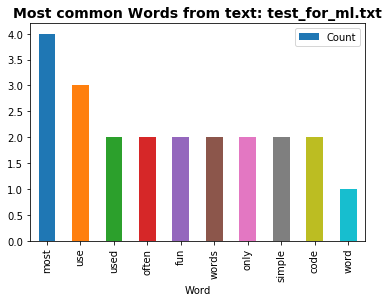

In [62]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
plt.title("Most common Words from text: "+my_text, fontdict={'size':14, 'weight': 'bold'});

In [63]:
df.head(10)

,Word,Count
0,most,4
1,use,3
2,used,2
3,often,2
4,fun,2
5,words,2
6,only,2
7,simple,2
8,code,2
9,word,1


In [98]:
# To install the wordcloud use the bellow commands
# conda install -c conda-forge wordcloud
# https://www.datacamp.com/community/tutorials/wordcloud-python
# https://www.commonlounge.com/discussion/317a12109a634fc1aa44150ea806bbf3

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import cm
import numpy as np

In [111]:
wrds = df.Word

# WORDS without spaces
wrds =  df["Word"].str.replace(" ","")
wrds.head()

0     most
1      use
2     used
3    often
4      fun
Name: Word, dtype: object

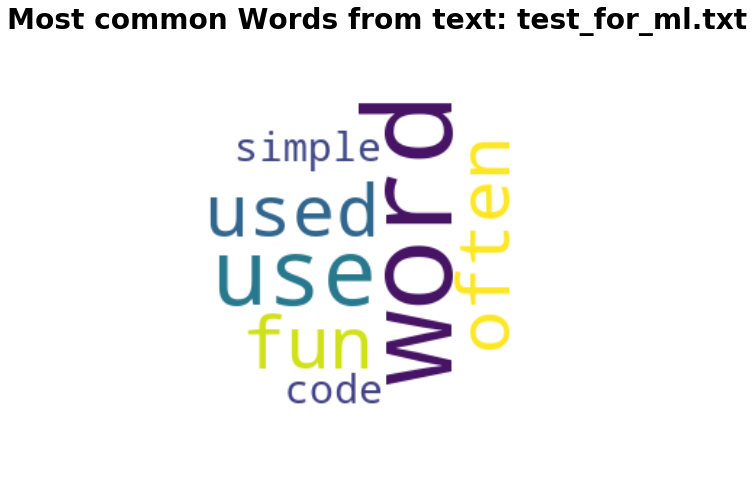

In [113]:
# Plot The WORDS in a Circle

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white",  mask=mask).generate(" ".join(wrds))

#wc = WordCloud( background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
#plt.tight_layout(pad=0)
plt.title("Most common Words from text: "+my_text, fontdict={'size':28, 'weight': 'bold'});

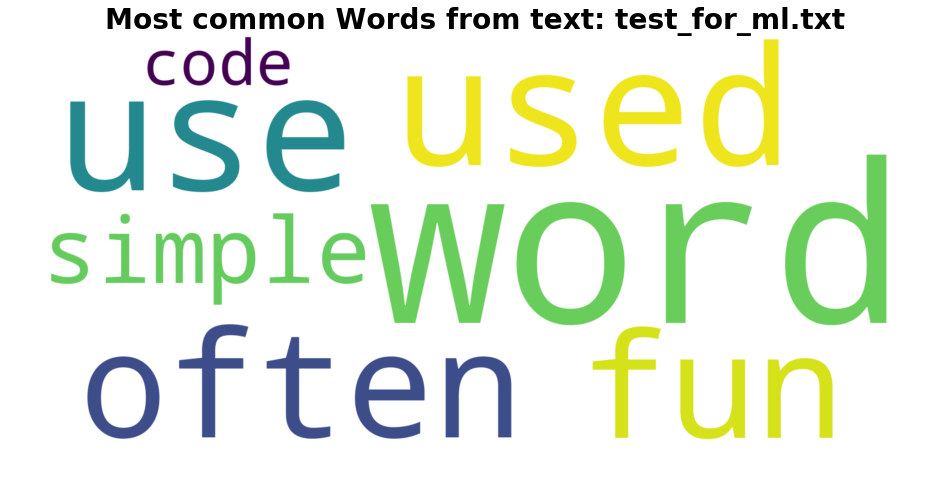

In [114]:
# Plot The WORDS in a Frame

wc = WordCloud( background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
#plt.tight_layout(pad=0)
plt.title("Most common Words from text: "+my_text, fontdict={'size':28, 'weight': 'bold'});